# Problem Statement: Develop a forecasting model for predicting the prices of Binance coin

### Installing Tensorflow for LSTM modelling

In [691]:
!pip3 install --upgrade tensorflow
!pip install Keras

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [692]:
#Importing Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [693]:
#Importing the data
binanceData=pd.read_csv("Binance Coin - Historic data.csv")
binanceData

,Date,Price(in dollars),Open,High,Low,Vol.,Change%
0,"Jul 27, 2021",303.29,304.31,307.62,298.53,2.26M,-0.33
1,"Jul 26, 2021",304.31,302.60,327.62,301.19,2.86M,0.58
2,"Jul 25, 2021",302.57,302.55,303.09,292.85,1.25M,-0.19
3,"Jul 24, 2021",303.15,298.91,305.01,296.16,1.81M,1.42
4,"Jul 23, 2021",298.89,293.51,301.15,281.68,1.98M,1.83
...,...,...,...,...,...,...,...
1352,"Nov 13, 2017",1.68,1.49,1.74,1.49,166.01K,12.75
1353,"Nov 12, 2017",1.49,1.66,1.70,1.34,456.48K,-10.24
1354,"Nov 11, 2017",1.66,1.71,1.93,1.58,256.71K,-2.92
1355,"Nov 10, 2017",1.71,1.99,2.02,1.60,483.23K,-14.07


In [694]:
binanceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1357 non-null   object 
 1   Price(in dollars)  1357 non-null   float64
 2   Open               1357 non-null   float64
 3   High               1357 non-null   float64
 4   Low                1357 non-null   float64
 5   Vol.               1357 non-null   object 
 6   Change%            1357 non-null   float64
dtypes: float64(5), object(2)
memory usage: 74.3+ KB


In [695]:
#Creating a new list of column Vol. in order to convert from string to float
list1=list(binanceData.iloc[0:1358,5])

In [672]:
list_final=[]
for i in list1:
    length=len(i)
    if(i[length-1]=='M' or i[length-1]=='m'):
        i=float(i[0:length-1])*1000000
        list_final.append('%.2f'%i)
    elif(i[length-1]=='K' or i[length-1]=='k'):
        i=float(i[0:length-1])*1000
        list_final.append('%.2f'%i)
    else:
        list_final.append(np.nan)

In [696]:
df=pd.DataFrame(list_final)
df.columns=['Volume']

In [698]:
df['Volume']=pd.to_numeric(df.Volume)
df

,Volume
0,2260000.0
1,2860000.0
2,1250000.0
3,1810000.0
4,1980000.0
...,...
1352,166010.0
1353,456480.0
1354,256710.0
1355,483230.0


In [699]:
#To check if there are any null values present in the data
df.isnull().values.any()

True

In [700]:
#Finding total null values 
df.isnull().sum()

Volume    1
dtype: int64

In [701]:
df.shape

(1357, 1)

In [702]:
binanceData['Vol.']=df
binanceData.shape

(1357, 7)

In [703]:
#Dropping all the null values
binanceData.dropna( axis=0, how="any", thresh=None, subset=None, inplace=True)
binanceData

,Date,Price(in dollars),Open,High,Low,Vol.,Change%
0,"Jul 27, 2021",303.29,304.31,307.62,298.53,2260000.0,-0.33
1,"Jul 26, 2021",304.31,302.60,327.62,301.19,2860000.0,0.58
2,"Jul 25, 2021",302.57,302.55,303.09,292.85,1250000.0,-0.19
3,"Jul 24, 2021",303.15,298.91,305.01,296.16,1810000.0,1.42
4,"Jul 23, 2021",298.89,293.51,301.15,281.68,1980000.0,1.83
...,...,...,...,...,...,...,...
1352,"Nov 13, 2017",1.68,1.49,1.74,1.49,166010.0,12.75
1353,"Nov 12, 2017",1.49,1.66,1.70,1.34,456480.0,-10.24
1354,"Nov 11, 2017",1.66,1.71,1.93,1.58,256710.0,-2.92
1355,"Nov 10, 2017",1.71,1.99,2.02,1.60,483230.0,-14.07


In [704]:
#Converting to standard date time
binanceData['Date']=pd.to_datetime(binanceData.Date)
binanceData

,Date,Price(in dollars),Open,High,Low,Vol.,Change%
0,2021-07-27,303.29,304.31,307.62,298.53,2260000.0,-0.33
1,2021-07-26,304.31,302.60,327.62,301.19,2860000.0,0.58
2,2021-07-25,302.57,302.55,303.09,292.85,1250000.0,-0.19
3,2021-07-24,303.15,298.91,305.01,296.16,1810000.0,1.42
4,2021-07-23,298.89,293.51,301.15,281.68,1980000.0,1.83
...,...,...,...,...,...,...,...
1352,2017-11-13,1.68,1.49,1.74,1.49,166010.0,12.75
1353,2017-11-12,1.49,1.66,1.70,1.34,456480.0,-10.24
1354,2017-11-11,1.66,1.71,1.93,1.58,256710.0,-2.92
1355,2017-11-10,1.71,1.99,2.02,1.60,483230.0,-14.07


### Installing Pycoingecko, A cryptocurrecy API, to plot the graphs

In [705]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [706]:
import plotly.graph_objects as go
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

In [707]:
cg = CoinGeckoAPI()

In [708]:
fig = go.Figure(
                data=[go.Candlestick(x=binanceData['Date'],
                open=binanceData['Open'], 
                high=binanceData['High'],
                low=binanceData['Low'], 
                close=binanceData['Price(in dollars)'])    
                ])                                         #creating a candlestick chart

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

In [709]:
bin_candel=binanceData.iloc[0:31,0:5]
bin_candel

,Date,Price(in dollars),Open,High,Low
0,2021-07-27,303.29,304.31,307.62,298.53
1,2021-07-26,304.31,302.60,327.62,301.19
2,2021-07-25,302.57,302.55,303.09,292.85
3,2021-07-24,303.15,298.91,305.01,296.16
4,2021-07-23,298.89,293.51,301.15,281.68
5,2021-07-22,293.53,293.08,297.69,287.55
6,2021-07-21,293.08,264.59,298.69,261.51
7,2021-07-20,264.59,280.48,283.25,255.79
8,2021-07-19,280.47,302.16,303.49,279.38
9,2021-07-18,302.18,300.34,309.00,299.60


In [710]:
fig = go.Figure(data=[go.Candlestick(x=bin_candel['Date'],
                open=bin_candel['Open'], 
                high=bin_candel['High'],
                low=bin_candel['Low'], 
                close=bin_candel['Price(in dollars)'])    
                ])                                         #creating a candlestick chart

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

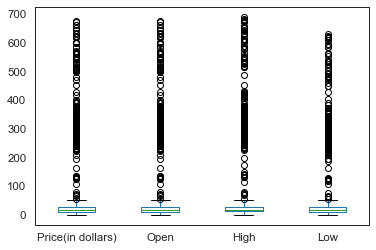

In [711]:
binanceData[['Price(in dollars)','Open','High','Low']].plot(kind='box')

In [712]:
#Log Scaling
for col in ['Price(in dollars)', 'Open', 'High', 'Low' , 'Vol.']:
    binanceData[col] = np.log1p(binanceData[col])

In [713]:
binanceData

,Date,Price(in dollars),Open,High,Low,Vol.,Change%
0,2021-07-27,5.717981,5.721328,5.732111,5.702215,14.630876,-0.33
1,2021-07-26,5.721328,5.715711,5.794902,5.711056,14.866333,0.58
2,2021-07-25,5.715612,5.715546,5.717324,5.683069,14.038655,-0.19
3,2021-07-24,5.717521,5.703482,5.723618,5.694271,14.408838,1.42
4,2021-07-23,5.703416,5.685313,5.710924,5.644316,14.498608,1.83
...,...,...,...,...,...,...,...
1352,2017-11-13,0.985817,0.912283,1.007958,0.912283,12.019809,12.75
1353,2017-11-12,0.912283,0.978326,0.993252,0.850151,13.031302,-10.24
1354,2017-11-11,0.978326,0.996949,1.075002,0.947789,12.455706,-2.92
1355,2017-11-10,0.996949,1.095273,1.105257,0.955511,13.088250,-14.07


In [714]:
fig = go.Figure(data=[go.Candlestick(x=binanceData['Date'],
                open=binanceData['Open'], 
                high=binanceData['High'],
                low=binanceData['Low'], 
                close=binanceData['Price(in dollars)'])    
                ])                                         #creating a candlestick chart

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

## Box plot after scalling of data

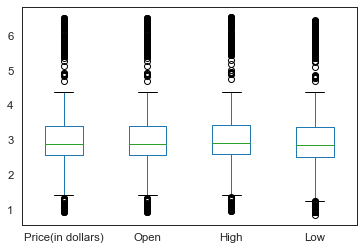

In [716]:
binanceData[['Price(in dollars)','Open','High','Low']].plot(kind='box')

In [718]:
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Building the model

In [719]:
dataset = binanceData['Price(in dollars)'].values
dataset = np.reshape(dataset, (-1, 1))             #To reshape the dimensions of array 

#Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

#Splitting the data into traing data and testing data
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 15
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [720]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Epoch 1/20
14/14 [==============================] - 3s 48ms/step - loss: 0.1646 - val_loss: 0.0071
Epoch 2/20
14/14 [==============================] - 0s 6ms/step - loss: 0.0191 - val_loss: 0.0033
Epoch 3/20
14/14 [==============================] - 0s 6ms/step - loss: 0.0054 - val_loss: 0.0035
Epoch 4/20
14/14 [==============================] - 0s 6ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 5/20
14/14 [==============================] - 0s 5ms/step - loss: 0.0027 - val_loss: 0.0015
Epoch 6/20
14/14 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 7/20
14/14 [==============================] - 0s 8ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 8/20
14/14 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 9/20
14/14 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 10/20
14/14 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 11/20
14/14 

In [721]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])


### Evaluating the Accuracy of the Model

In [722]:
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))



Train Mean Absolute Error: 0.09842089906352706
Train Root Mean Squared Error: 0.1424011247755165
Test Mean Absolute Error: 0.13047463906461826
Test Root Mean Squared Error: 0.1926052688831255


### Plotting the Actual and Predicted data

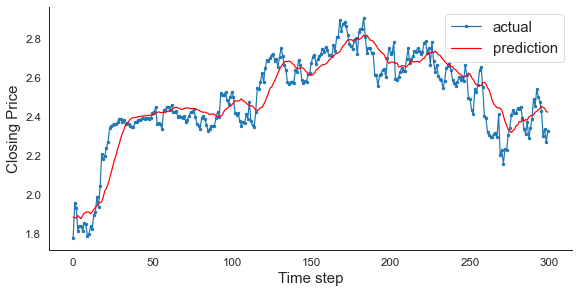

In [723]:
aa=[x for x in range(300)]


plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:300], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:300], 'r', label="prediction")

plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Closing Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();